# Loading data

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, UpSampling2D
from keras.utils.vis_utils import plot_model


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

print('Shape x_train: ', np.shape(train_images))
print('Shape y_train: ', np.shape(train_labels))

Shape x_train:  (50000, 32, 32, 3)
Shape y_train:  (50000, 1)


## Displays sample images

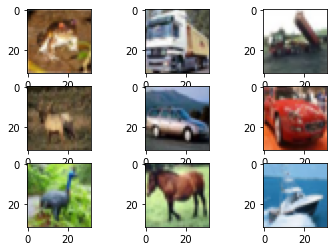

In [36]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i])
plt.show()

## Normalizing the data

In [37]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [39]:
from keras import layers
import keras

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

#-------------------------------------------------------------------
# Encoder
# The input is a 32x32x3 image (since it is RGB, the last index corresponds to the Red/Green/Blue scale)
input_img = Input(shape=(32, 32, 3))
# Add a convolutional Layer
layer = Conv2D(8, (3, 3), padding='same')(input_img)
# Activate using Relu
layer = Activation('relu')(layer)
# Reduces dimensionality (extract features in lower dimensional space)
layer = MaxPooling2D((2, 2), padding='same')(layer)
layer = Conv2D(12, (3, 3), padding='same')(layer)
layer = Activation('relu')(layer)
# Latent space
encoded = MaxPooling2D((2, 2), padding='same')(layer)

#-------------------------------------------------------------------
# Decoder
layer = Conv2D(16, (3, 3), padding='same')(encoded)
layer = Activation('relu')(layer)
layer = UpSampling2D((2, 2))(layer)
layer = Conv2D(12, (3, 3), padding='same')(layer)
layer = Activation('relu')(layer)
layer = UpSampling2D((2, 2))(layer)
layer = Conv2D(3, (3, 3), padding='same')(layer)
decoded = Activation('sigmoid')(layer)

# Constructs the model based on the input and the decoded features
autoencoder = keras.Model(input_img, decoded)

# uses 
autoencoder.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])

In [ ]:
# Since autoencoder have the same input and output, instead of having 
# fit(X,y), we have fit(X, X)
# Takes 10 minutes to run on colab
history = autoencoder.fit(train_images, train_images, epochs=10, validation_data=((test_images, test_images)))

Epoch 1/10
 539/1563 [=========>....................] - ETA: 1:01 - loss: 0.0150 - accuracy: 0.6329

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


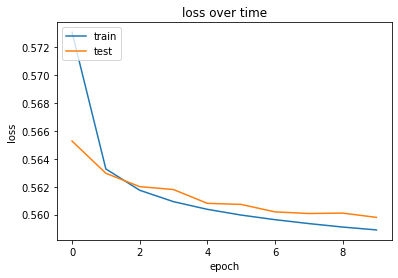

In [6]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss over time')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
c10test = autoencoder.predict(train_images)

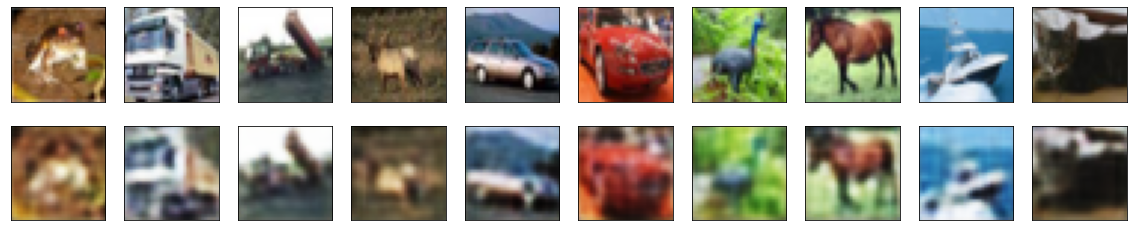

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
num = 10
for i in range(num):
    # display original
    ax = plt.subplot(2, num, i+1)
    plt.imshow(train_images[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, num, i +1 + num)
    plt.imshow(c10test[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Image Colorisation

In [4]:
# Step 1: Define our X and Y components
# The lab image convertion allows us to detect the luminance of the image
from skimage.color import rgb2lab

X = rgb2lab(train_images);

In [5]:
X_train = []
y_train = []
for image in train_images:
    illuminance = rgb2lab(image)
    X_train.append(illuminance[:,:,0])
    y_train.append(illuminance[:,:,1:]/110)

In [6]:
# Reshape in such a way that 
# ----> size(X) = (50000,32,32,1)
# ----> size(X) = (50000,32,32,2)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_train_final = X_train.reshape(X_train.shape+(1,))
print(np.shape(X_train_final))
print(np.shape(y_train))

(50000, 32, 32, 1)
(50000, 32, 32, 2)


In [17]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(32, 32, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))

#Decoder

model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])


In [19]:
history = model.fit(X_train_final, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 400s 256ms/step - loss: 0.0143 - accuracy: 0.6313
Epoch 2/10
1563/1563 [==============================] - 400s 256ms/step - loss: 0.0138 - accuracy: 0.6391
Epoch 3/10
1563/1563 [==============================] - 400s 256ms/step - loss: 0.0134 - accuracy: 0.6444
Epoch 4/10
1563/1563 [==============================] - 399s 255ms/step - loss: 0.0132 - accuracy: 0.6506
Epoch 5/10
1563/1563 [==============================] - 399s 255ms/step - loss: 0.0130 - accuracy: 0.6533
Epoch 6/10
1563/1563 [==============================] - 399s 255ms/step - loss: 0.0128 - accuracy: 0.6578
Epoch 7/10
1563/1563 [==============================] - 400s 256ms/step - loss: 0.0126 - accuracy: 0.6606
Epoch 8/10
1563/1563 [==============================] - 399s 255ms/step - loss: 0.0124 - accuracy: 0.6649
Epoch 9/10
1563/1563 [==============================] - 400s 256ms/step - loss: 0.0122 - accuracy: 0.6681
Epoch 10/10
1563/1563 [=======================

dict_keys(['loss', 'accuracy'])


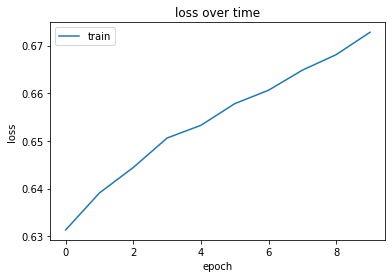

In [34]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('accuracy over time')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

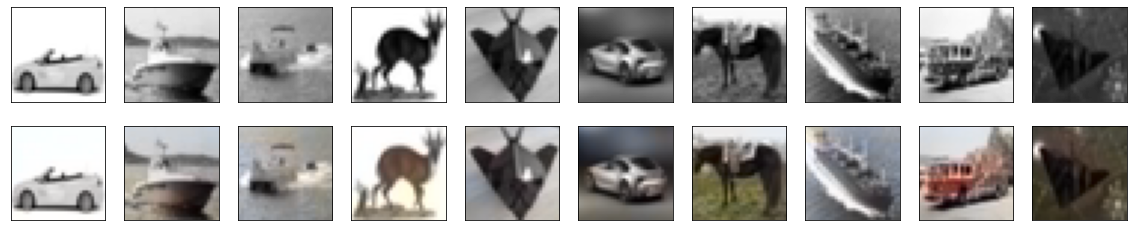

In [31]:
from skimage.color import lab2rgb
from skimage.color import rgb2gray
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
plt.figure(figsize=(20, 4))
num = 10
for index in range(num):
  col_img = []
  test_1 = (train_images[index])
  col_img.append(test_1)

  col_img = np.array(col_img, dtype=float)
  col_img = rgb2lab(1.0/255*col_img)[:,:,:,0]
  col_img = col_img.reshape(col_img.shape+(1,))

  # Predicts the image
  y_pred = model.predict(col_img)
  # Since values of a and b [-110; 110]
  output = y_pred*110

  # Reconstructs the output
  res = np.zeros((32,32,3))
  res[:,:,0] = col_img[0][:,:,0]

  res[:,:,1:] = output[0]

    # display original
  ax = plt.subplot(2, num, index+1)
  plt.imshow(rgb2gray(train_images[index]), cmap = plt.get_cmap('gray'))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, num, index +1 + num)
  plt.imshow(lab2rgb(res))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()